In [13]:
import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, AveragePooling2D, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [15]:
# Define image parameters
img_height, img_width = 128, 128
batch_size = 32


# Define paths to your dataset directories
train_dir = '/Users/milind/Documents/try/Untitled Folder/dataset/Train'      # Replace with your training data directory
validation_dir = '/Users/milind/Documents/try/Untitled Folder/dataset/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images   
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill strategy for new pixels
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 22233 images belonging to 14 classes.
Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
2025-05-03 15:10:04.693681: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-03 15:10:04.693851: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-05-03 15:10:04.693856: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1746265204.694711 42844820 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, d

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 14)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281,694 (4.89 MB)

 Trainable params: 1,281,694 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


2025-05-03 15:10:06.805883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


694/694 ━━━━━━━━━━━━━━━━━━━━ 186s 264ms/step - accuracy: 0.2288 - loss: 2.1906 - val_accuracy: 0.4047 - val_loss: 1.4619
Epoch 2/100
  1/694 ━━━━━━━━━━━━━━━━━━━━ 2:28 214ms/step - accuracy: 0.4375 - loss: 1.4316

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.4375 - loss: 1.4316 - val_accuracy: 0.3980 - val_loss: 1.4701
Epoch 3/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 192s 277ms/step - accuracy: 0.5093 - loss: 1.3536 - val_accuracy: 0.5416 - val_loss: 1.1321
Epoch 4/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.5312 - loss: 1.0568 - val_accuracy: 0.5337 - val_loss: 1.1461
Epoch 5/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 171s 246ms/step - accuracy: 0.6079 - loss: 1.0905 - val_accuracy: 0.6562 - val_loss: 0.9106
Epoch 6/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.5938 - loss: 1.1078 - val_accuracy: 0.6522 - val_loss: 0.9381
Epoch 7/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 170s 245ms/step - accuracy: 0.6536 - loss: 0.9611 - val_accuracy: 0.6649 - val_loss: 0.8502
Epoch 8/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.7188 - loss: 0.7727 - val_accuracy: 0.6675 - val_loss: 0.8468
Epoch 9/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 174s 251ms/step - accuracy: 0.6831 - loss: 0.886

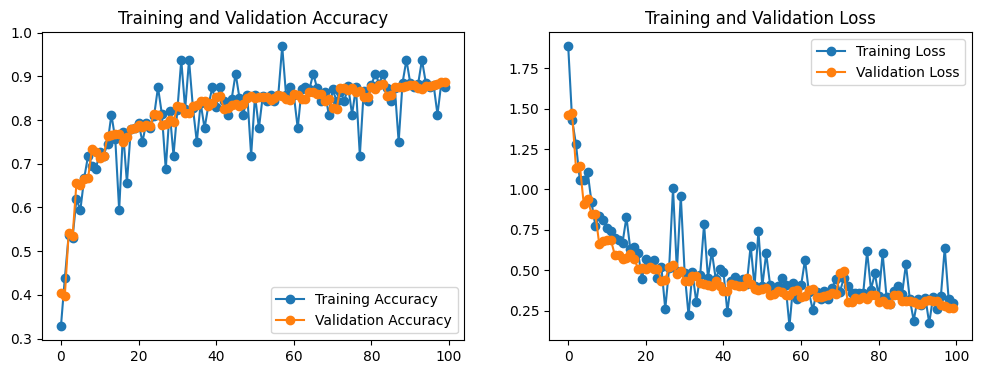

In [5]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=30, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)


# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=100,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [6]:
model.save('saved_models/Basic_Complete_100.keras')

### 100 epochs 

In [7]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

248/248 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.8801 - loss: 0.2820
Test Accuracy: 88.75%
Test loss: 0.2686


In [8]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

Found 7927 images belonging to 14 classes.
248/248 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step
                precision    recall  f1-score   support

   freshapples       0.99      0.98      0.99       791
   freshbanana       1.00      1.00      1.00       892
 freshcucumber       0.35      0.33      0.34       279
     freshokra       0.61      0.78      0.68       370
  freshoranges       0.97      0.98      0.98       388
   freshpatato       0.86      0.86      0.86       487
    freshtamto       0.95      0.88      0.91       679
  rottenapples       0.98      0.98      0.98       988
  rottenbanana       1.00      1.00      1.00       900
rottencucumber       0.56      0.70      0.62       255
    rottenokra       0.17      0.00      0.01       224
 rottenoranges       0.96      0.96      0.96       403
  rottenpatato       0.81      0.89      0.84       630
   rottentamto       0.87      0.93      0.90       641

      accuracy                           0.89      7927
     macro avg  

Epoch 1/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 110s 157ms/step - accuracy: 0.8850 - loss: 0.3277 - val_accuracy: 0.8871 - val_loss: 0.2655
Epoch 2/100
  1/694 ━━━━━━━━━━━━━━━━━━━━ 1:44 150ms/step - accuracy: 0.9062 - loss: 0.3620

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9062 - loss: 0.3620 - val_accuracy: 0.8879 - val_loss: 0.2650
Epoch 3/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 110s 158ms/step - accuracy: 0.8874 - loss: 0.3128 - val_accuracy: 0.8734 - val_loss: 0.3149
Epoch 4/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.8438 - loss: 0.4154 - val_accuracy: 0.8742 - val_loss: 0.3128
Epoch 5/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 109s 157ms/step - accuracy: 0.8860 - loss: 0.3241 - val_accuracy: 0.8243 - val_loss: 0.4426
Epoch 6/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.8750 - loss: 0.2938 - val_accuracy: 0.8227 - val_loss: 0.4532
Epoch 7/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 101s 145ms/step - accuracy: 0.8786 - loss: 0.3401 - val_accuracy: 0.7276 - val_loss: 0.6803
Epoch 8/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.6250 - loss: 0.8271 - val_accuracy: 0.7351 - val_loss: 0.6704
Epoch 9/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 105s 151ms/step - accuracy: 0.8577 - loss: 0.409

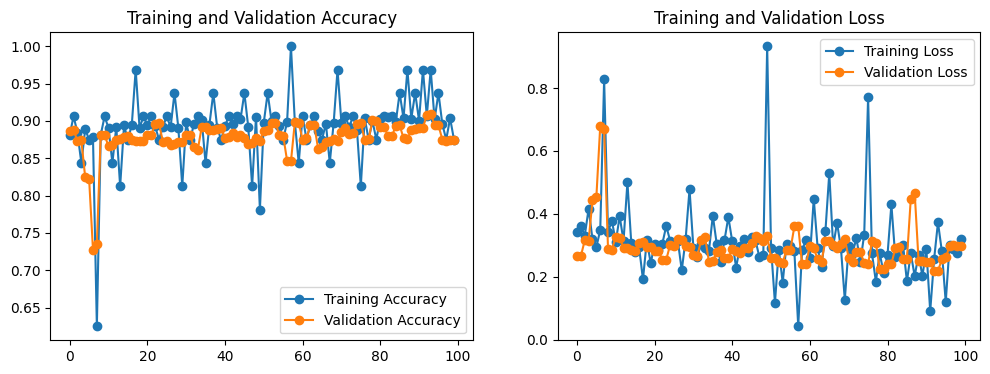

In [13]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=100,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
model.save('saved_models/Basic_Complete_200.keras')

### result after 200 epochs

In [15]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

248/248 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.9317 - loss: 0.1612
Test Accuracy: 90.80%
Test loss: 0.2189


In [16]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 28s 111ms/step
                precision    recall  f1-score   support

   freshapples       0.99      1.00      0.99       791
   freshbanana       1.00      1.00      1.00       892
 freshcucumber       0.53      0.60      0.56       279
     freshokra       0.72      0.67      0.69       370
  freshoranges       0.98      0.99      0.98       388
   freshpatato       0.93      0.79      0.86       487
    freshtamto       0.96      0.96      0.96       679
  rottenapples       0.99      0.99      0.99       988
  rottenbanana       1.00      1.00      1.00       900
rottencucumber       0.50      0.87      0.64       255
    rottenokra       0.18      0.03      0.05       224
 rottenoranges       0.98      0.98      0.98       403
  rottenpatato       0.83      0.94      0.88       630
   rottentamto       0.95      0.93      0.94       641

      accuracy                           0.91      7927
     macro avg       0.83      0.84      0.82      7927
  

Epoch 1/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 230s 331ms/step - accuracy: 0.9102 - loss: 0.2514 - val_accuracy: 0.8892 - val_loss: 0.2733
Epoch 2/100
  1/694 ━━━━━━━━━━━━━━━━━━━━ 2:31 219ms/step - accuracy: 0.8750 - loss: 0.4566

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.8750 - loss: 0.4566 - val_accuracy: 0.8890 - val_loss: 0.2750
Epoch 3/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 206s 297ms/step - accuracy: 0.9118 - loss: 0.2461 - val_accuracy: 0.8961 - val_loss: 0.2390
Epoch 4/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.9375 - loss: 0.1383 - val_accuracy: 0.8947 - val_loss: 0.2431
Epoch 5/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 205s 295ms/step - accuracy: 0.9041 - loss: 0.2780 - val_accuracy: 0.8856 - val_loss: 0.2707
Epoch 6/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.8750 - loss: 0.2597 - val_accuracy: 0.8865 - val_loss: 0.2678
Epoch 7/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 170s 245ms/step - accuracy: 0.9098 - loss: 0.2609 - val_accuracy: 0.8880 - val_loss: 0.2670
Epoch 8/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.7812 - loss: 0.3555 - val_accuracy: 0.8906 - val_loss: 0.2621
Epoch 9/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 163s 235ms/step - accuracy: 0.9064 - loss: 0.269

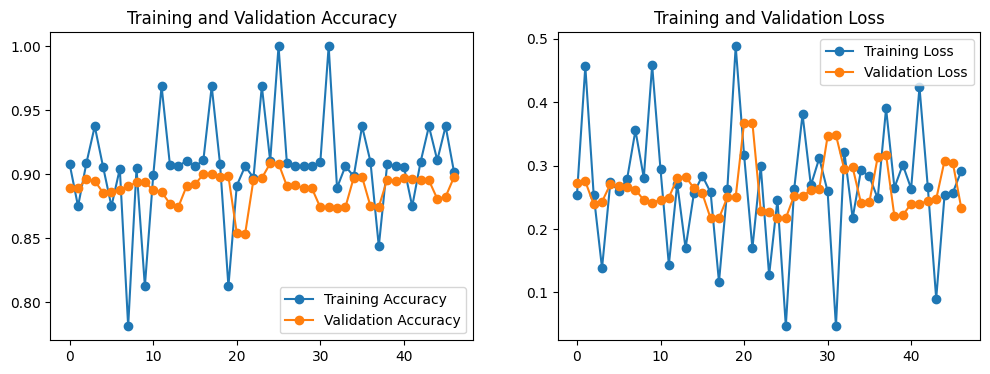

In [21]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=100,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
model.save('saved_models/Basic_Complete_247.keras')

### early stop at 247 epoch

In [23]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

248/248 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.9233 - loss: 0.1498
Test Accuracy: 90.01%
Test loss: 0.2166


In [24]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step
                precision    recall  f1-score   support

   freshapples       0.99      1.00      0.99       791
   freshbanana       1.00      1.00      1.00       892
 freshcucumber       0.34      0.14      0.19       279
     freshokra       0.58      0.91      0.70       370
  freshoranges       0.98      0.97      0.98       388
   freshpatato       0.92      0.85      0.88       487
    freshtamto       0.95      0.94      0.94       679
  rottenapples       0.98      0.99      0.98       988
  rottenbanana       1.00      1.00      1.00       900
rottencucumber       0.50      0.82      0.62       255
    rottenokra       0.00      0.00      0.00       224
 rottenoranges       0.99      0.94      0.96       403
  rottenpatato       0.85      0.94      0.89       630
   rottentamto       0.93      0.93      0.93       641

      accuracy                           0.90      7927
     macro avg       0.79      0.82      0.79      7927
  

In [5]:
from tensorflow.keras.models import load_model
model=load_model(
    'saved_models/Basic_Complete_200.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

2025-05-04 09:38:53.285342: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-04 09:38:53.285628: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-05-04 09:38:53.285635: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1746331733.286132 43289025 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1746331733.286557 43289025 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


2025-05-04 09:39:00.964560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


694/694 ━━━━━━━━━━━━━━━━━━━━ 161s 229ms/step - accuracy: 0.9046 - loss: 0.2706 - val_accuracy: 0.8775 - val_loss: 0.2994
Epoch 2/100
  1/694 ━━━━━━━━━━━━━━━━━━━━ 1:19 114ms/step - accuracy: 0.8750 - loss: 0.3574

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.8750 - loss: 0.3574 - val_accuracy: 0.8804 - val_loss: 0.2918
Epoch 3/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 155s 224ms/step - accuracy: 0.8990 - loss: 0.3058 - val_accuracy: 0.8908 - val_loss: 0.2539
Epoch 4/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.9375 - loss: 0.3292 - val_accuracy: 0.8903 - val_loss: 0.2543
Epoch 5/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 156s 225ms/step - accuracy: 0.9072 - loss: 0.2702 - val_accuracy: 0.9035 - val_loss: 0.2465
Epoch 6/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.8125 - loss: 0.3111 - val_accuracy: 0.9019 - val_loss: 0.2488
Epoch 7/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 155s 223ms/step - accuracy: 0.9017 - loss: 0.2792 - val_accuracy: 0.9033 - val_loss: 0.2196
Epoch 8/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.9375 - loss: 0.0995 - val_accuracy: 0.9038 - val_loss: 0.2182
Epoch 9/100
694/694 ━━━━━━━━━━━━━━━━━━━━ 163s 235ms/step - accuracy: 0.9076 - loss: 0.253

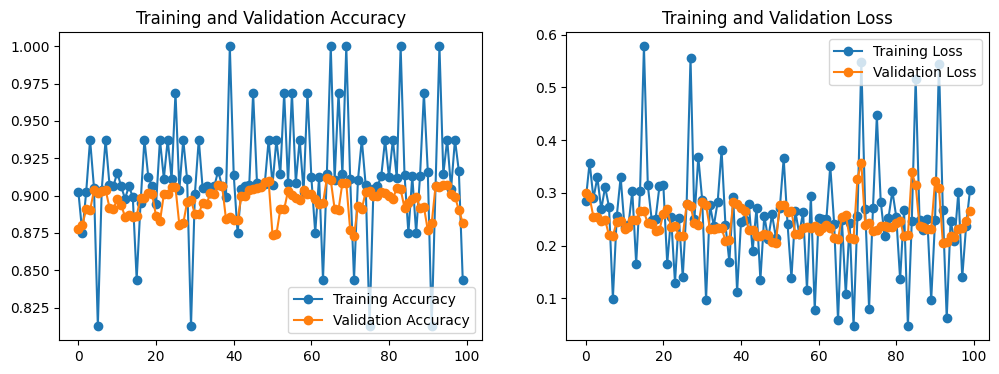

In [7]:
# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=50, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=100,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
model.save('saved_models/Basic_Complete_300.keras')

### After 300 epochs

In [9]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

248/248 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9072 - loss: 0.2099
Test Accuracy: 90.92%
Test loss: 0.2057


In [10]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

Found 7927 images belonging to 14 classes.
248/248 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step
                precision    recall  f1-score   support

   freshapples       1.00      1.00      1.00       791
   freshbanana       1.00      1.00      1.00       892
 freshcucumber       0.48      0.37      0.42       279
     freshokra       0.63      0.76      0.69       370
  freshoranges       0.99      0.98      0.99       388
   freshpatato       0.96      0.83      0.89       487
    freshtamto       0.95      0.94      0.95       679
  rottenapples       0.98      1.00      0.99       988
  rottenbanana       1.00      1.00      1.00       900
rottencucumber       0.51      0.84      0.63       255
    rottenokra       0.58      0.14      0.22       224
 rottenoranges       0.99      0.98      0.99       403
  rottenpatato       0.85      0.96      0.90       630
   rottentamto       0.93      0.93      0.93       641

      accuracy                           0.91      7927
     macro avg  

In [17]:
from tensorflow.keras.models import load_model
model=load_model(
    'saved_models/1-Complete_30.keras',
    custom_objects={"LeakyReLU": LeakyReLU},
    compile=False
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

2025-05-04 23:45:04.556775: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-04 23:45:04.556863: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-05-04 23:45:04.556871: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1746382504.557147 44122128 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1746382504.557510 44122128 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-05-04 23:45:05.947698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


248/248 ━━━━━━━━━━━━━━━━━━━━ 47s 188ms/step
                precision    recall  f1-score   support

   freshapples       1.00      0.98      0.99       791
   freshbanana       0.99      1.00      0.99       892
 freshcucumber       0.67      0.51      0.58       279
     freshokra       0.68      0.82      0.75       370
  freshoranges       0.98      0.97      0.98       388
   freshpatato       0.93      0.78      0.84       487
    freshtamto       0.84      0.94      0.89       679
  rottenapples       0.98      0.99      0.98       988
  rottenbanana       0.98      1.00      0.99       900
rottencucumber       0.72      0.57      0.64       255
    rottenokra       0.56      0.61      0.58       224
 rottenoranges       0.94      0.98      0.96       403
  rottenpatato       0.84      0.92      0.88       630
   rottentamto       0.89      0.79      0.84       641

      accuracy                           0.90      7927
     macro avg       0.86      0.85      0.85      7927
  